In [11]:
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

%matplotlib inline

tweets = pd.read_csv('C:\\Users\\hp_pc\\Downloads\\tweets_all.csv', encoding = "ISO-8859-1")

In [12]:
tweets['text'][1]

'#MorningRush with @MariaOkan Wake uppppp! Good morning! Welcome to the Morning Rush! What time do you normally wake up and why?'

In [13]:
#Preprocessing:
tweets['tweetos'] = '' 

#add first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


tweets['text'][1]

'#MorningRush with Wake uppppp! Good morning! Welcome to the Morning Rush! What time do you normally wake up and why?'

In [14]:
tweets['text'] = tweets['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets['text'] = tweets['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['text'][1]

'morningrush with wake uppppp good morning welcome to the morning rush what time do you normally wake up and why'

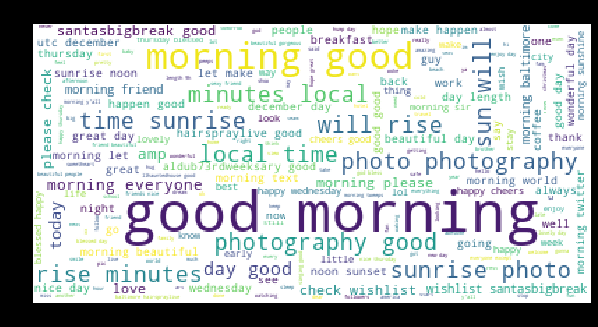

In [15]:
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(10,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning")
wordcloud(tweets,'text') 

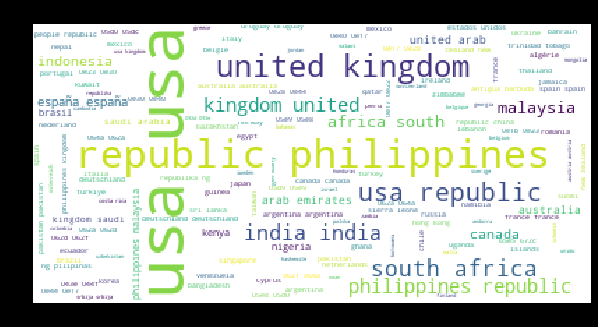

In [16]:
tweets['country'] = tweets['country'].apply(lambda x: x.lower())
tweets['country'].replace('states united','united states',inplace=True)
tweets['country'].replace('united states','usa',inplace=True)
tweets['country'].replace('united Kingdom','uk',inplace=True)
tweets['country'].replace('republic philippines','philippines republic',inplace=True)
wordcloud(tweets, 'country')

In [17]:
tweets['source'][2]

'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>'

In [18]:
tweets['source_new'] = ''

for i in range(len(tweets['source'])):
    m = re.search('(.?)(.*)', tweets['source'][i])
    try:
        tweets['source_new'][i]=m.group(0)
    except AttributeError:
        tweets['source_new'][i]=tweets['source'][i]
        
tweets['source_new'] = tweets['source_new'].str.replace('', ' ', case=False)

In [19]:
tweets['source_new'].head()

0     < a   h r e f = " h t t p : / / i n s t a g r...
1     < a   h r e f = " h t t p : / / t w i t t e r...
2     < a   h r e f = " h t t p : / / t w i t t e r...
3     < a   h r e f = " h t t p : / / t w i t t e r...
4     < a   h r e f = " h t t p : / / t w i t t e r...
Name: source_new, dtype: object

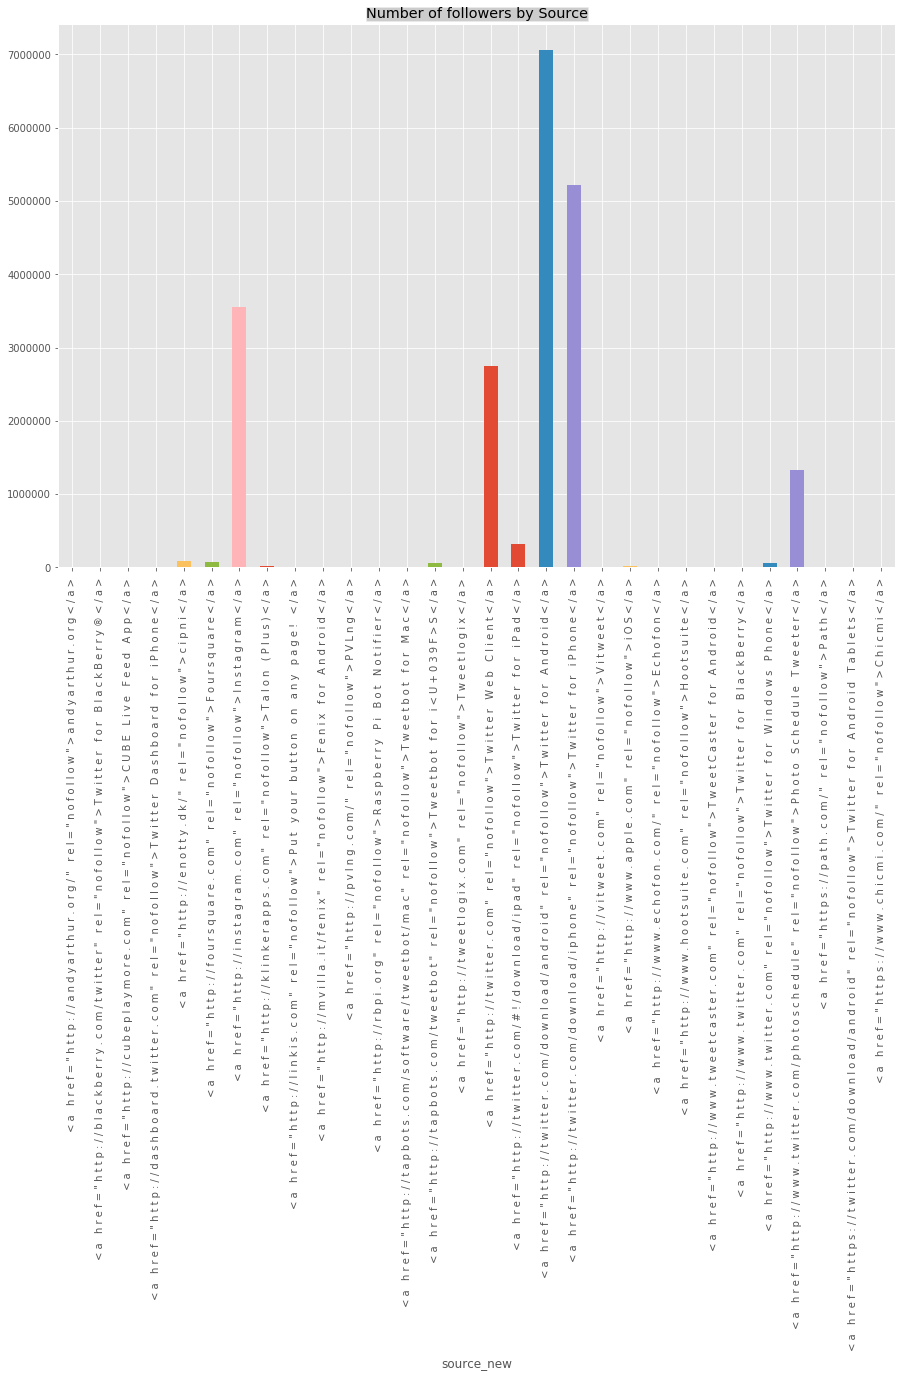

In [20]:
tweets_by_type = tweets.groupby(['source_new'])['followers_count'].sum()
plt.title('Number of followers by Source', bbox={'facecolor':'0.8', 'pad':0})
tweets_by_type.transpose().plot(kind='bar',figsize=(15, 10))

In [23]:
import sklearn
from sklearn import *
tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text']]       
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_lem'].str.upper())
sid = SentimentIntensityAnalyzer()
tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp_pc\AppData\Roaming\nltk_data...


True

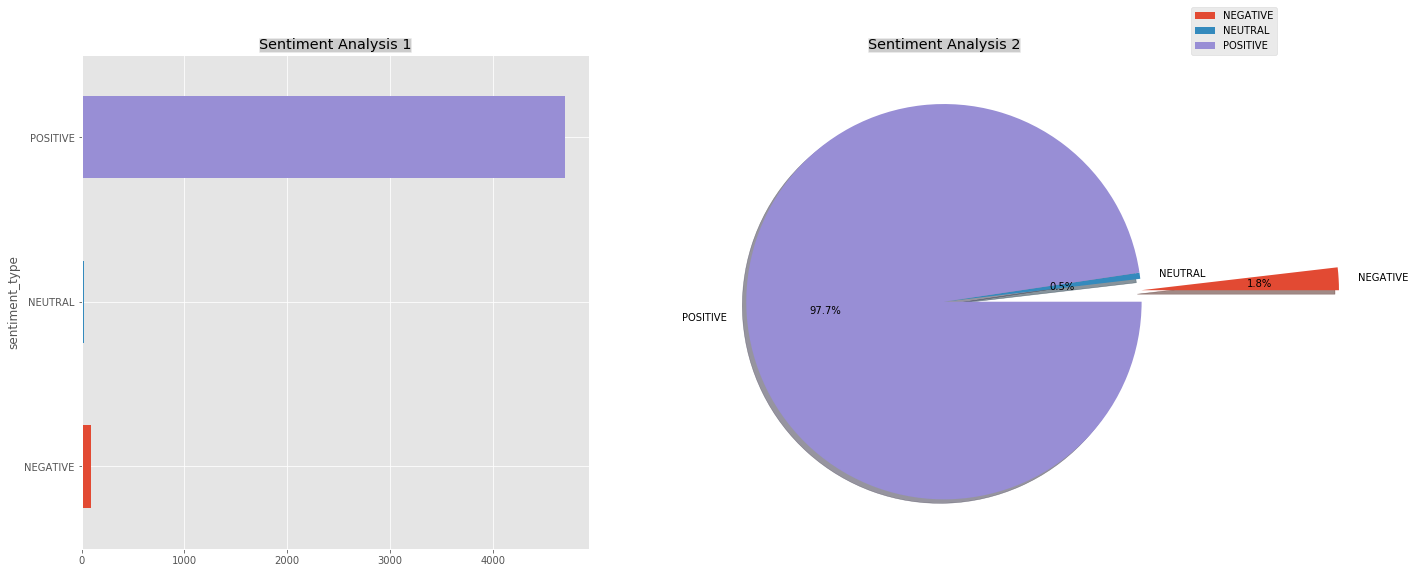

In [44]:
tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [45]:
tweets[tweets.sentiment_type == 'NEGATIVE'].text.reset_index(drop = True)[0:5]

0    good morning it's time for pastries almond and...
1                                   good morning bitch
2    not a good look when you take a study break to...
3    good morning niece/ it's been awhile- miss you...
4                   good morning from hell that is all
Name: text, dtype: object

In [52]:
tweets[tweets.sentiment_type == 'POSITIVE'].text.reset_index(drop = True)[0:10]

0    good morning njspots toxictins njshooterz njis...
1    good morning dina have a terrific hump day lit...
2                                good morning everyone
3                              good morning my friends
4    good morning abujait breakfast time amp eatery...
5                                   good morning all x
6    good morning i love my vinyl a collection of 2...
7                 good morning mrs h have a lovely day
8    good morning seen on facebook- michelle tomboc...
9                                   good morning world
Name: text, dtype: object